In [2]:
%matplotlib inline

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras import layers, losses
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LeakyReLU

This code blow loads in our data set and outputs some of the original images.

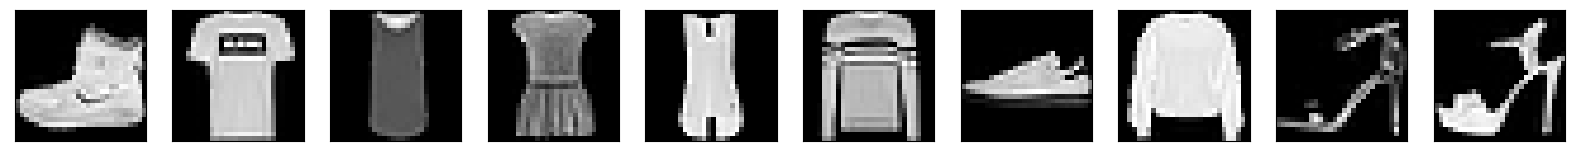

In [3]:
(x_train, _), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

The code below initializes our autoencoder model.

In [4]:
class Autoencoder(Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim   
        self.encoder = tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(latent_dim, activation='relu'),
            ])
        self.decoder = tf.keras.Sequential([
            layers.Dense(784, activation='sigmoid'),
            layers.Reshape((28, 28))
            ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

This next code segment takes in an array of different latent dimension sizes, and generates different autoencoders with different these latent dimension sizes. The value loss of the last epoch at the end of training for each respective latent dimension size is then recorded and stored an in array which is used to plot a graph displaying the change in value loss across different latent dimension sizes (shown in the next code segment). This code also outputs what the decoded images look like in comparison to the raw image after training is complete for each latent dimension size.

Latent Dimension:  2
Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0706 - val_loss: 0.0573
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0533 - val_loss: 0.0491
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0471 - val_loss: 0.0454
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0450 - val_loss: 0.0445
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0445 - val_loss: 0.0443
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0444 - val_loss: 0.0442
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0443 - val_loss: 0.0442
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0443 - val_loss: 0.0441
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0442 - val_loss: 0.0441
Epoch 10/10
1875/1875 [==============================] - 4s 2

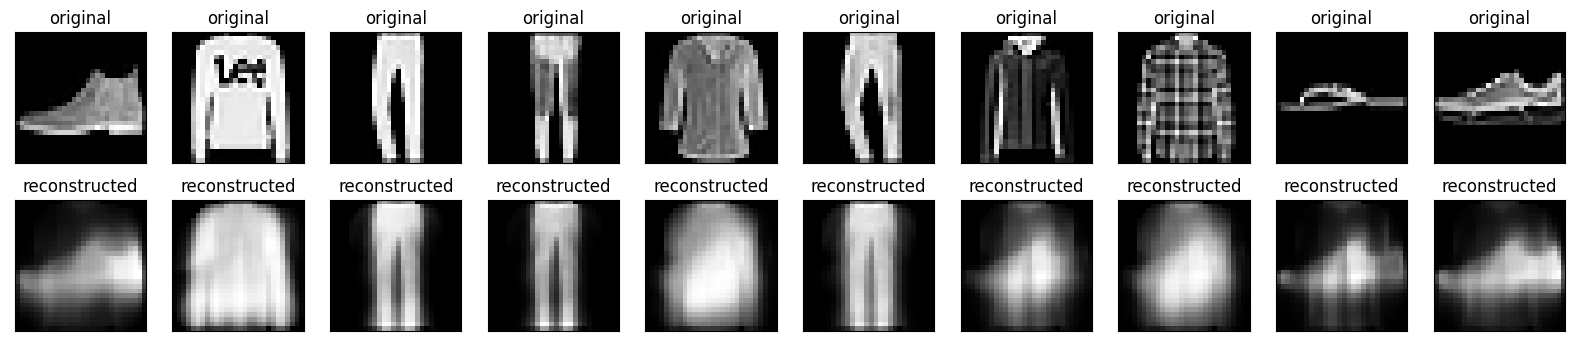

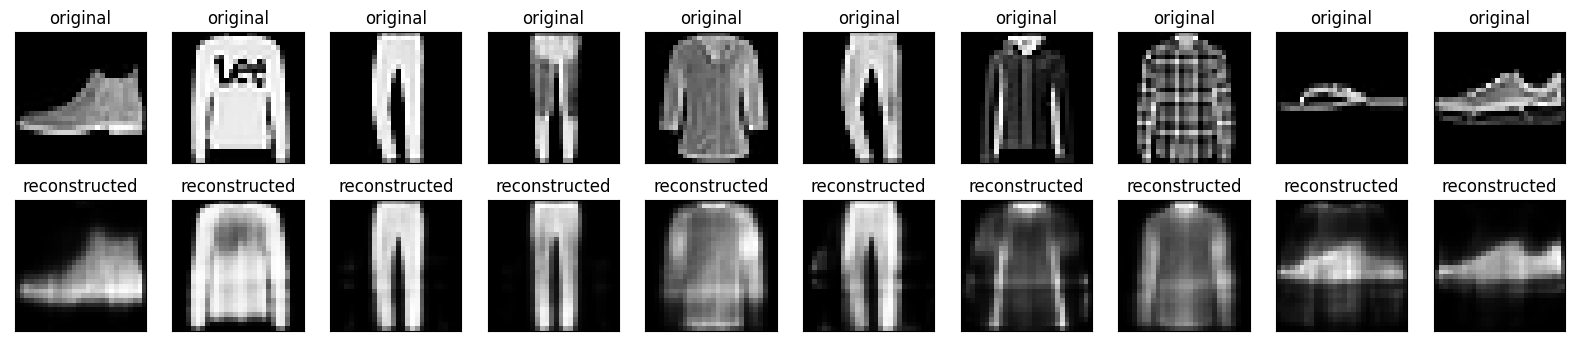

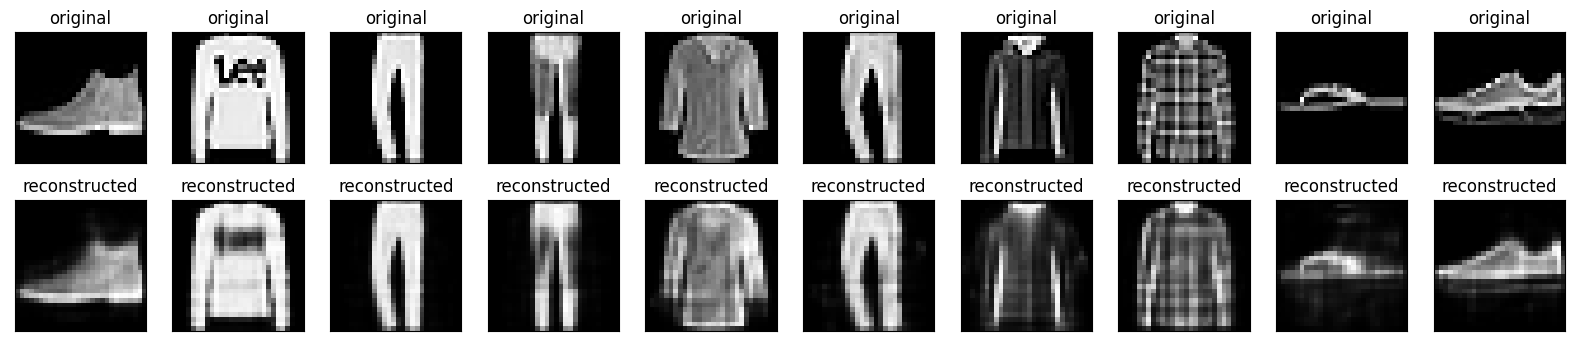

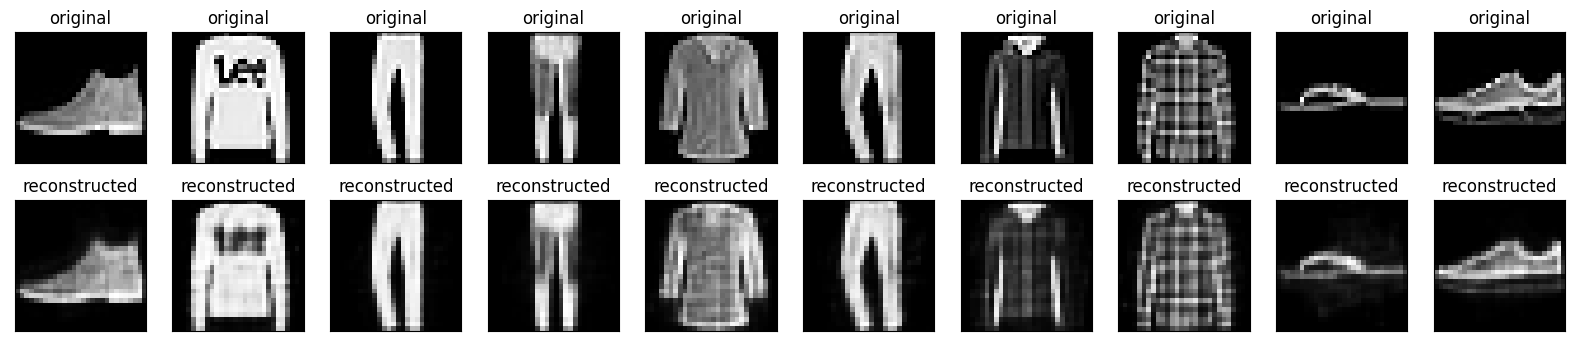

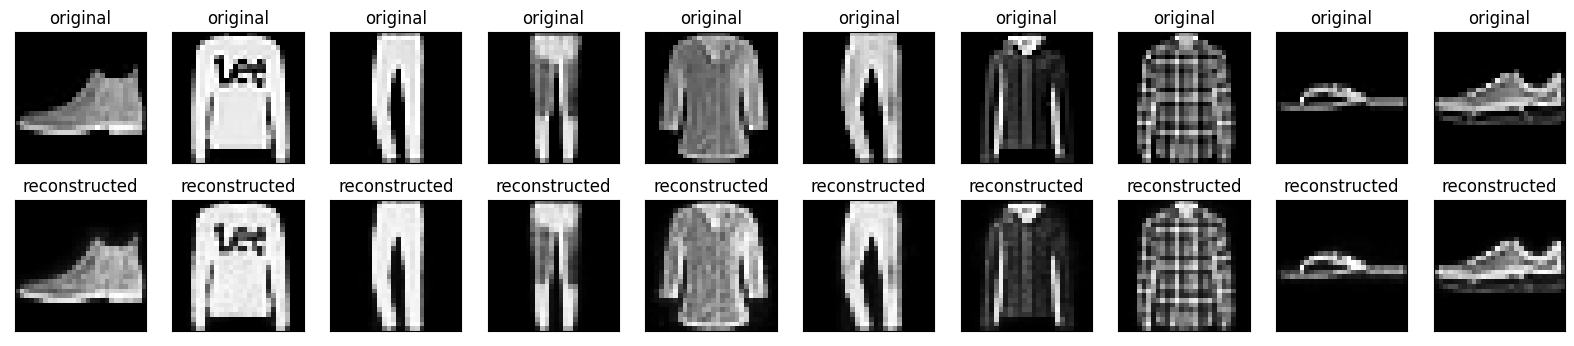

In [5]:
latent_dim_array = [2, 16, 64, 128, 512]

history_new = []
# takes last val loss from last epoch
x=10

for i in range(len(latent_dim_array)):
  print("Latent Dimension: ", latent_dim_array[i]) # dimension
  autoencoder = Autoencoder(latent_dim = latent_dim_array[i])
  autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
  train_history = autoencoder.fit(x_train, x_train,
                  epochs=10,
                  shuffle=True,
                  validation_data=(x_test, x_test))
  
  last_iter_loss = train_history.history['val_loss'][-1]
  history_new.append(last_iter_loss)
  print(history_new)
  encoded_imgs = autoencoder.encoder(x_test).numpy()
  decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

  
  plt.figure(figsize=(20, 4))
  for i in range(n):
      # display original
      ax = plt.subplot(2, n, i + 1)
      plt.imshow(x_test[i])
      plt.title("original")
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      # display reconstruction
      ax = plt.subplot(2, n, i + 1 + n)
      plt.imshow(decoded_imgs[i])
      plt.title("reconstructed")
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
  
  

The next code segment plots the value loss from the last epoch of each cycle with a different latent dimension size.

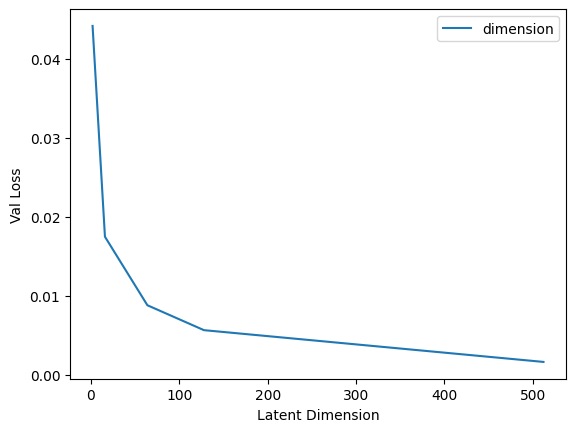

In [12]:
plt.plot(latent_dim_array, history_new)
plt.legend(['dimension', 'loss'])

plt.xlabel("Latent Dimension")
plt.ylabel("Val Loss")
plt.show()